In [510]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
from pprint import pprint

In [511]:
font_path = 'C:/Windows/Fonts/KoPubBatangMedium.ttf'
fontprop = fm.FontProperties(fname = font_path)

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "gray",
    "grid.linestyle": "dashed",
    'grid.linewidth': '0.5',
    "axes.labelcolor": "#000000",
    "font.family":fontprop.get_name(),
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rc('axes', unicode_minus = 'False')
sns.set(rc=rc)

In [512]:
train = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/train.csv').drop('id',axis = 1)
test = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/test.csv').drop('id',axis = 1)
sub = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/sample_submission.csv')

In [513]:
df = train.copy()
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


# **데이터 전처리**

In [514]:
def summarize(data):
    
    result = pd.DataFrame()

    result['Count'] = data.count()
    result['Nunique'] = data.nunique().values
    result['Missing value'] = data.isna().sum().values
    result['Most Freq Value'] = data.mode().iloc[0]
    result['Min'] = data.describe().T['min']
    result['Max'] = data.describe().T['max']
    result['Mean'] = data.describe().T['mean']
    result['Median'] = data.describe().T['50%']

    return result

In [515]:
summarize(df)

,Count,Nunique,Missing value,Most Freq Value,Min,Max,Mean,Median
laptop_ID,912,912,0,1,1.0,1319.0,661.273026,663.5
Company,912,19,0,Dell,NaN,NaN,NaN,NaN
Product,912,475,0,Inspiron 3567,NaN,NaN,NaN,NaN
TypeName,912,6,0,Notebook,NaN,NaN,NaN,NaN
Inches,912,17,0,15.6,10.1,18.4,15.060746,15.6
ScreenResolution,912,37,0,Full HD 1920x1080,NaN,NaN,NaN,NaN
Cpu,912,102,0,Intel Core i5 7200U 2.5GHz,NaN,NaN,NaN,NaN
Ram,912,9,0,8GB,NaN,NaN,NaN,NaN
Memory,912,36,0,256GB SSD,NaN,NaN,NaN,NaN
Gpu,912,94,0,Intel HD Graphics 620,NaN,NaN,NaN,NaN


In [516]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


**고민해야할 것**

- product, gpu , weight 를 범주형 변수로 처리 할 것인가  ?
    - train set 과 test set 의 프로덕트들이 동일해야 범주형 변수가 의미가 있다 

In [517]:
# test set 과 train set 의 범주형 변수들은 같을까 ? 같다면 더미변수화 해도 되고 다르다면 더미변수화를 하면 안된다 

obj_value = df.describe(include = 'O').columns

need_processing = []

for col in obj_value:
    
    test_un = set(test[col].unique())
    train_un = set(train[col].unique())
    
    num = len(test_un - train_un)    
    print(col, num, sep = '\t')
    
    if num > 0:
        need_processing.append(col)

Company	0
Product	143
TypeName	0
ScreenResolution	3
Cpu	16
Ram	0
Memory	3
Gpu	16
OpSys	0
Weight	15


In [518]:
df[need_processing].head()

,Product,ScreenResolution,Cpu,Memory,Gpu,Weight
0,Chromebook Flip,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,64GB Flash Storage,Intel HD Graphics 515,1.2kg
1,Rog Strix,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,256GB SSD + 1TB HDD,AMD Radeon RX 580,3.2kg
2,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,1TB HDD,Intel HD Graphics 620,1.85kg
3,XPS 13,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,512GB SSD,Intel Iris Plus Graphics 640,1.29kg
4,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,1.0TB Hybrid,Intel HD Graphics 520,2.32kg


**계획**

> 1. product 는 어떻게 할지 모르겠다 좀 더 생각해보자 
> 2. 화면 비율은 숫자로 시작하는 것들만 추출하자 1920 x 1080 과 같은 것을 말이다.
> 3. CPU 는 intel 과 AMD 만 있는 것 같은데 해당 경우의 표기법들을 보자 
> 4. Memory 는 SSD 냐 HDD냐에 따라 다를 수 있을 것이다. 그리고 용량을 TB,GB를 통일 시켜줄 필요가 있다.
> 5. weight 는 수치형 변수로 처리하자 


# **ScreenResolution**

In [519]:
# 맨 처음 화면 비율은 숫자로만 생각하려 했으나 Full HD 인지 OLED 인지 터치 스크린인지 등 다양한 것이 고려되어야 한다 
# Test set 과 Train set 에서 다른 변수가 3개 밖에 없었으니 그 변수 3개를 수정을 하는 것이 나을 것 같다 


train_screen = set(df['ScreenResolution'].unique())
test_screen = set(test['ScreenResolution'].unique())

print('Test set 에는 있고 Train set에는 없는 경우 ')

pprint(
    test_screen - train_screen
)

Test set 에는 있고 Train set에는 없는 경우 
{'IPS Panel Full HD 1366x768',
 'IPS Panel Touchscreen 2400x1600',
 'Touchscreen / 4K Ultra HD 3840x2160'}


In [520]:
cond = df['ScreenResolution'].map(lambda x: x.split(' ')[0]) == 'IPS' # IPS로 시작하는 경우들

pprint(df.loc[cond,'ScreenResolution'].unique())

# 바꿔줄 변수 목록 

# 'IPS Panel Full HD 1366x768' -> 'IPS Panel 1366x768' 

array(['IPS Panel Full HD 1920x1080', 'IPS Panel Full HD 2560x1440',
       'IPS Panel 2560x1440', 'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel 1366x768', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2560x1600',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Retina Display 2736x1824',
       'IPS Panel Touchscreen 2560x1440',
       'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Touchscreen 1366x768',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2880x1800',
       'IPS Panel Full HD 2160x1440', 'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Quad HD+ 3200x1800', 'IPS Panel Full HD 1920x1200'],
      dtype=object)


In [521]:
cond = test['ScreenResolution'] == 'IPS Panel Full HD 1366x768'

test.loc[cond,'ScreenResolution'] = 'IPS Panel 1366x768' 

* 터치 스크린 유무가 가격 차이에 유의미 할까 ? 

In [522]:
cond = df['ScreenResolution'].map(lambda x:x.split()[-2] if len(x.split()) >= 2 else x) == 'Touchscreen'

df['Size'] = df['ScreenResolution'].map(lambda x: x.split()[-1])

df['Touchscreen'] = 0

df.loc[cond,'Touchscreen'] = 1

Text(0.5, 1.0, 'Touch screen 유무에 따른 가격 차이')

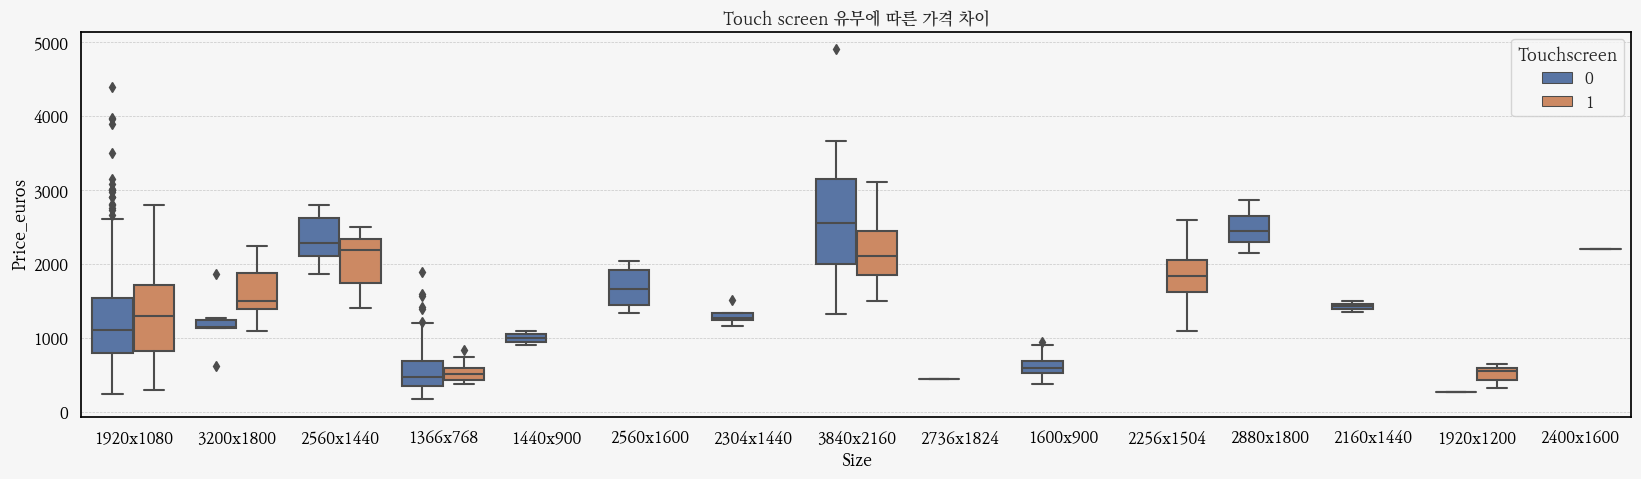

In [523]:
plt.figure(figsize = (20,5))

sns.boxplot(data = df,
            x = 'Size',
            y = 'Price_euros',
            hue = 'Touchscreen')

plt.title('Touch screen 유무에 따른 가격 차이')

* 그렇게 큰 차이가 나는 거 같지는 않다. 컴퓨터의 사양이 더 중요한거니까 .. 
* 사이즈가 가장 비슷한 변수로 채우자 

* 'IPS Panel Touchscreen 2400x1600',
* 'Touchscreen / 4K Ultra HD 3840x2160'

In [524]:
cond = df['ScreenResolution'].map(lambda x : x.split()[-1]) == '2400x1600'

test.loc[test['ScreenResolution'] == 'IPS Panel Touchscreen 2400x1600', 'ScreenResolution'] = df.loc[cond,'ScreenResolution'].values[0]

In [525]:
cond = df['ScreenResolution'].map(lambda x : x.split()[-1]) == '3840x2160'


test.loc[test['ScreenResolution'] == 'Touchscreen / 4K Ultra HD 3840x2160', 'ScreenResolution'] = 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'

**CPU**

In [526]:
train_cpu = set(df['Cpu'])
test_cpu = set(test['Cpu'])

print('Test set 에는 있고 Train set에는 없는 경우 ')

pprint(
    test_cpu - train_cpu
)

Test set 에는 있고 Train set에는 없는 경우 
{'AMD A12-Series 9700P 2.5GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'AMD FX 8800P 2.1GHz',
 'AMD FX 9830P 3GHz',
 'Intel Atom x5-Z8300 1.44GHz',
 'Intel Celeron Dual Core N3060 1.60GHz',
 'Intel Core M 1.1GHz',
 'Intel Core M 6Y54 1.1GHz',
 'Intel Core M 7Y30 1.0GHz',
 'Intel Core M m3-7Y30 2.2GHz',
 'Intel Core i5 6440HQ 2.6GHz',
 'Intel Core i5 7500U 2.7GHz',
 'Intel Core i5 7Y57 1.2GHz',
 'Intel Core i7 2.7GHz',
 'Intel Core i7 6560U 2.2GHz',
 'Samsung Cortex A72&A53 2.0GHz'}


In [527]:
intel_m_idx_list = []
intel_i5_idx_list = []
intel_i7_idx_list = []

amd_idx_list = []

for num,var in enumerate(df['Cpu'].map(lambda x: x.split()[:3])):
    
    if var[0] == 'Intel':
        if var[1] == 'Core':
            if var[2] == 'M':
                intel_m_idx_list.append(num)
            if var[2] == 'i5':
                intel_i5_idx_list.append(num)
            if var[2] == 'i7':
                intel_i7_idx_list.append(num)
                
    if var[0] == 'AMD':
        amd_idx_list.append(num)

In [528]:
need_update = [
    'Intel Core M 1.1GHz',
    'Intel Core M 6Y54 1.1GHz',
    'Intel Core M 7Y30 1.0GHz',
    'Intel Core M m3-7Y30 2.2GHz',
]

for up in need_update:

    test.loc[test['Cpu'] == up, 'Cpu'] = df.loc[intel_m_idx_list].mode()['Cpu'][0] 

In [529]:
df.loc[intel_i7_idx_list]['Cpu'].unique()

array(['Intel Core i7 7500U 2.7GHz', 'Intel Core i7 7660U 2.5GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7820HK 2.9GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 6820HK 2.7GHz',
       'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i7 7600U 2.8GHz',
       'Intel Core i7 7Y75 1.3GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Core i7 6920HQ 2.9GHz', 'Intel Core i7 6820HQ 2.7GHz',
       'Intel Core i7 7560U 2.4GHz', 'Intel Core i7 2.2GHz',
       'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i7 6500U 2.50GHz',
       'Intel Core i7 2.8GHz', 'Intel Core i7 7500U 2.5GHz',
       'Intel Core i7 2.9GHz', 'Intel Core i7 7700HQ 2.7GHz'],
      dtype=object)

In [530]:
need_update = [
    'Intel Core i5 6440HQ 2.6GHz',
    'Intel Core i5 7500U 2.7GHz',
    'Intel Core i5 7Y57 1.2GHz',
    'Intel Core i7 2.7GHz',
    'Intel Core i7 6560U 2.2GHz'
]

test.loc[test['Cpu'] == need_update[0], 'Cpu'] = 'Intel Core i5 6300U 2.4GHz'
test.loc[test['Cpu'] == need_update[1], 'Cpu'] = 'Intel Core i5 7300HQ 2.5GHz'
test.loc[test['Cpu'] == need_update[2], 'Cpu'] = 'Intel Core i5 7Y54 1.2GHz'
test.loc[test['Cpu'] == need_update[3], 'Cpu'] = 'Intel Core i7 6820HK 2.7GHz'
test.loc[test['Cpu'] == need_update[4], 'Cpu'] = 'Intel Core i7 6500U 2.50GHz'


In [531]:
need_update = [
    'AMD A12-Series 9700P 2.5GHz',
    'AMD E-Series E2-9000e 1.5GHz',
    'AMD FX 8800P 2.1GHz',
    'AMD FX 9830P 3GHz'
]

# 비슷한 제품으로 변경하기 
test.loc[test['Cpu'] == need_update[0], 'Cpu'] = 'AMD A12-Series 9720P 2.7GHz'
test.loc[test['Cpu'] == need_update[1], 'Cpu'] = 'AMD E-Series E2-9000 2.2GHz'

# 웹서핑을 통해 비슷한 제품으로 변경 
test.loc[test['Cpu'] == need_update[2], 'Cpu'] = 'AMD A8-Series 7410 2.2GHz'
test.loc[test['Cpu'] == need_update[3], 'Cpu'] = 'AMD A9-Series 9420 2.9GHz'

In [532]:
pprint(set(test['Cpu']) - set(df['Cpu']))

{'Intel Atom x5-Z8300 1.44GHz',
 'Intel Celeron Dual Core N3060 1.60GHz',
 'Samsung Cortex A72&A53 2.0GHz'}


In [533]:
df.loc[intel_i5_idx_list]['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     143
Intel Core i5 8250U 1.6GHz      45
Intel Core i5 6200U 2.3GHz      43
Intel Core i5 7300HQ 2.5GHz     21
Intel Core i5 7300U 2.6GHz      11
Intel Core i5 6300U 2.4GHz       9
Intel Core i5 6300HQ 2.3GHz      4
Intel Core i5 1.6GHz             3
Intel Core i5 7Y54 1.2GHz        3
Intel Core i5 3.1GHz             2
Intel Core i5 2.3GHz             2
Intel Core i5 6260U 1.8GHz       1
Intel Core i5 7200U 2.70GHz      1
Intel Core i5 7440HQ 2.8GHz      1
Intel Core i5 1.8GHz             1
Intel Core i5 2.9GHz             1
Intel Core i5 7200U 2.50GHz      1
Intel Core i5 2.0GHz             1
Intel Core i5 7200U 2.7GHz       1
Intel Core i5 1.3GHz             1
Name: Cpu, dtype: int64

In [534]:
test.loc[test['Cpu'] == 'Intel Atom x5-Z8300 1.44GHz','Cpu'] ='Intel Core i5 7200U 2.5GHz'
test.loc[test['Cpu'] == 'Intel Celeron Dual Core N3060 1.60GHz','Cpu'] ='Intel Core i5 7200U 2.5GHz'
test.loc[test['Cpu'] == 'Samsung Cortex A72&A53 2.0GHz','Cpu'] ='Intel Core i5 7200U 2.5GHz'

# **Memory**

In [535]:
pprint(set(test['Memory']) - set(df['Memory']))

{'512GB SSD +  1.0TB Hybrid', '1.0TB HDD', '16GB SSD'}


In [536]:
pprint(df['Memory'].unique())

array(['64GB Flash Storage', '256GB SSD +  1TB HDD', '1TB HDD',
       '512GB SSD', '1.0TB Hybrid', '32GB SSD', '500GB HDD', '256GB SSD',
       '128GB SSD +  1TB HDD', '128GB SSD', '32GB Flash Storage',
       '128GB Flash Storage', '180GB SSD', '512GB SSD +  1TB HDD',
       '16GB Flash Storage', '512GB Flash Storage', '2TB HDD',
       '256GB SSD +  2TB HDD', '512GB SSD +  256GB SSD', '1TB SSD',
       '256GB SSD +  256GB SSD', '508GB Hybrid', '256GB Flash Storage',
       '128GB HDD', '256GB SSD +  1.0TB Hybrid', '512GB SSD +  512GB SSD',
       '128GB SSD +  2TB HDD', '64GB Flash Storage +  1TB HDD',
       '512GB SSD +  2TB HDD', '64GB SSD', '240GB SSD',
       '1TB HDD +  1TB HDD', '1TB SSD +  1TB HDD',
       '256GB SSD +  500GB HDD', '32GB HDD', '8GB SSD'], dtype=object)


In [537]:
test.loc[test['Memory'] == '512GB SSD +  1.0TB Hybrid', 'Memory'] = '512GB SSD +  1TB HDD'
test.loc[test['Memory'] == '1.0TB HDD', 'Memory'] = '1TB HDD'
test.loc[test['Memory'] == '16GB SSD', 'Memory'] = '16GB Flash Storage'

# **GPU**

In [538]:
pprint(
    set(test['Gpu']) - set(df['Gpu'])
)

{'AMD FirePro W5130M',
 'AMD R4 Graphics',
 'AMD Radeon Pro 455',
 'AMD Radeon R7 Graphics',
 'AMD Radeon R7 M360',
 'AMD Radeon R7 M365X',
 'AMD Radeon R7 M465',
 'AMD Radeon R9 M385',
 'AMD Radeon RX 560',
 'ARM Mali T860 MP4',
 'Intel HD Graphics 530',
 'Nvidia GeForce 920',
 'Nvidia GeForce 940M',
 'Nvidia GeForce GTX 1070M',
 'Nvidia GeForce GTX 930MX',
 'Nvidia GeForce GTX 940M'}


In [539]:
amd_cond = df['Gpu'].map(lambda x: x.split()[0]) == 'AMD'
intel_cond = df['Gpu'].map(lambda x: x.split()[0]) == 'Intel'
Nvidia_cond = df['Gpu'].map(lambda x: x.split()[0]) == 'Nvidia'

In [540]:
pprint(df[amd_cond]['Gpu'].unique())

test.loc[test['Gpu'] == 'AMD FirePro W5130M' , 'Gpu'] = 'AMD FirePro W4190M'
test.loc[test['Gpu'] == 'AMD R4 Graphics' , 'Gpu'] = 'AMD Radeon R4'
test.loc[test['Gpu'] == 'AMD Radeon Pro 455' , 'Gpu'] = 'AMD Radeon Pro 560'
test.loc[test['Gpu'] == 'AMD Radeon R7 Graphics' , 'Gpu'] = 'AMD Radeon R7'
test.loc[test['Gpu'] == 'AMD Radeon R7 M360' , 'Gpu'] = 'AMD Radeon R7 M440'
test.loc[test['Gpu'] == 'AMD Radeon R7 M365X' , 'Gpu'] = 'AMD Radeon R7 M440'
test.loc[test['Gpu'] == 'AMD Radeon R7 M465' , 'Gpu'] = 'AMD Radeon R7 M445'
test.loc[test['Gpu'] == 'AMD Radeon R9 M385' , 'Gpu'] = 'AMD Radeon Pro 560'
test.loc[test['Gpu'] == 'AMD Radeon RX 560' , 'Gpu'] = 'AMD Radeon RX 580'
test.loc[test['Gpu'] == 'ARM Mali T860 MP4' , 'Gpu'] = 'AMD Radeon R3'

array(['AMD Radeon RX 580', 'AMD Radeon 520', 'AMD Radeon 530',
       'AMD Radeon RX 540', 'AMD Radeon R5 M430', 'AMD R17M-M1-70',
       'AMD Radeon R2', 'AMD Radeon R7 M440', 'AMD Radeon R7',
       'AMD Radeon R5 M330', 'AMD Radeon R7 M445', 'AMD Radeon R5',
       'AMD Radeon R4', 'AMD Radeon R5 M420X', 'AMD Radeon R5 M420',
       'AMD Radeon 540', 'AMD Radeon RX 550', 'AMD Radeon R3',
       'AMD Radeon R2 Graphics', 'AMD Radeon R4 Graphics',
       'AMD Radeon R5 M315', 'AMD Radeon R7 M460', 'AMD Radeon R5 520',
       'AMD FirePro W4190M ', 'AMD FirePro W6150M', 'AMD Radeon Pro 555',
       'AMD FirePro W4190M', 'AMD Radeon Pro 560', 'AMD Radeon R5 430'],
      dtype=object)


In [541]:
test.loc[test['Gpu'] == 'Intel HD Graphics 530', 'Gpu'] = 'Intel HD Graphics 520'

In [542]:
pprint(df[Nvidia_cond]['Gpu'].unique())

test.loc[test['Gpu'] == 'Nvidia GeForce 920', 'Gpu'] = 'Nvidia GeForce 920MX'
test.loc[test['Gpu'] == 'Nvidia GeForce 940M', 'Gpu'] = 'Nvidia GeForce GT 940MX'
test.loc[test['Gpu'] == 'Nvidia GeForce GTX 1070M', 'Gpu'] = 'Nvidia GeForce GTX 1080'
test.loc[test['Gpu'] == 'Nvidia GeForce GTX 930MX', 'Gpu'] = 'Nvidia GeForce 920MX'
test.loc[test['Gpu'] == 'Nvidia GeForce GTX 940M', 'Gpu'] = 'Nvidia GeForce GTX 940MX'

array(['Nvidia GeForce GTX 1060', 'Nvidia GeForce GT 940MX',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce GTX 1050Ti',
       'Nvidia GeForce GTX 1050', 'Nvidia Quadro M520M',
       'Nvidia GeForce 930MX', 'Nvidia GeForce 940MX',
       'Nvidia GeForce GTX 980M', 'Nvidia GeForce GTX 950M',
       'Nvidia GeForce GTX1080', 'Nvidia GeForce GTX 1080',
       'Nvidia GeForce GTX 1050M', 'Nvidia Quadro M1000M',
       'Nvidia Quadro M1200', 'Nvidia GeForce MX150',
       'Nvidia Quadro M2200', 'Nvidia GeForce 920MX',
       'Nvidia GeForce MX130', 'Nvidia Quadro M620M',
       'Nvidia GTX 980 SLI', 'Nvidia GeForce GTX1060',
       'Nvidia GeForce GTX 960M', 'Nvidia Quadro M620',
       'Nvidia GeForce 920MX ', 'Nvidia GeForce 150MX',
       'Nvidia GeForce 930M', 'Nvidia GeForce 960M',
       'Nvidia GeForce 920M', 'Nvidia GeForce GTX 940MX',
       'Nvidia Quadro M2200M', 'Nvidia GeForce GTX 960<U+039C>',
       'Nvidia Qu

# **Weight**

In [543]:
df['Weight'] = df['Weight'].map(lambda x: float(x[:-2]))
test['Weight'] = test['Weight'].map(lambda x: float(x[:-2]))

In [544]:
del df['Size'],df['Touchscreen']

In [545]:
obj_value = df.describe(include = 'O').columns

need_processing = []

for col in obj_value:
    
    test_un = set(test[col].unique())
    train_un = set(train[col].unique())
    
    num = len(test_un - train_un)    
    print(col, num, sep = '\t')
    
    if num > 0:
        need_processing.append(col)

Company	0
Product	143
TypeName	0
ScreenResolution	0
Cpu	0
Ram	0
Memory	0
Gpu	0
OpSys	0


In [548]:
df = df.drop(['laptop_ID','Product'],axis = 1)
test = test.drop(['laptop_ID','Product'],axis = 1)

# Modeling

In [559]:
from sklearn.preprocessing import LabelEncoder

obj_cols = df.describe(include = 'O').columns

for col in obj_cols:
    
    scaler = LabelEncoder()
    
    df[col] = scaler.fit_transform(df[col])
    test[col] = scaler.transform(test[col])

In [583]:
from tqdm import tqdm 

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [564]:
X = df.drop('Price_euros',axis = 1)
y = df['Price_euros']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [576]:
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

et_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

catboost_param_grid = {
    'iterations': [100, 200, 500],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bylevel': [0.8, 1.0]
}

In [597]:
models = [RandomForestRegressor(),ExtraTreesRegressor(), XGBRegressor(), LGBMRegressor(verbose = -1), CatBoostRegressor(verbose = 0)]
params = [rf_param_grid,et_param_grid,xgb_param_grid,lgbm_param_grid,catboost_param_grid]
names = ['RandomForestRegressor','ExtraTreesRegressor', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor']


In [603]:
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

best_models = []

pred_list = []

for model_idx,model in tqdm(enumerate(models)):

    name = names[model_idx]
    
    print('--' * 20)
    print(name,'진행중')
        
    param_grid = params[model_idx]
    
    grid_model = GridSearchCV(model, param_grid = param_grid, cv = cv, scoring = 'neg_mean_absolute_error')
    
    grid_model.fit(x_train,y_train)
    
    best_models.append(grid_model.best_estimator_)
    
    print('5 FOLD 평균 점수',round(np.abs(grid_model.best_score_),2),sep = '\t')
    
    pred = grid_model.best_estimator_.predict(x_test)
    pred_list.append(pred)
    score = mean_absolute_error(y_test,pred)

    print('단일 모델 OOF 점수',round(score,2),sep = '\t')

0it [00:00, ?it/s]

----------------------------------------
RandomForestRegressor 진행중


1it [07:51, 471.69s/it]

5 FOLD 평균 점수	198.33
단일 모델 OOF 점수	193.35
----------------------------------------
ExtraTreesRegressor 진행중


2it [13:32, 394.48s/it]

5 FOLD 평균 점수	208.0
단일 모델 OOF 점수	192.78
----------------------------------------
XGBRegressor 진행중


3it [15:20, 263.98s/it]

5 FOLD 평균 점수	188.07
단일 모델 OOF 점수	187.91
----------------------------------------
LGBMRegressor 진행중


4it [16:45, 193.30s/it]

5 FOLD 평균 점수	206.21
단일 모델 OOF 점수	190.76
----------------------------------------
CatBoostRegressor 진행중


5it [18:37, 223.52s/it]

5 FOLD 평균 점수	191.52
단일 모델 OOF 점수	186.85


In [613]:
ensemble_pred = np.mean(pred_list,axis = 0)

ensemble_score = round(mean_absolute_error(y_test,ensemble_pred),2)

print('앙상블 모델 점수', ensemble_score, sep = '\t')

앙상블 모델 점수	178.56


In [622]:
pred_list = []

for model in best_models:
    model.fit(X,y)
    pred_list.append(model.predict(test))

In [623]:
result = np.mean(pred_list,axis = 0)

sub['Price_euros'] = result 

In [624]:
sub.to_csv('ensemble_2.csv',index = False)

# **OOF PRED**

In [631]:
split = 5 

result = np.zeros((len(test)))

for i,num in enumerate(range(split)):
    
    pred_list = np.zeros((len(test)))
    
    for model in best_models:
        
        x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42 + i)
        
        model.fit(x_train,y_train)
        pred_list += model.predict(test) / len(best_models)
        
    result += pred_list / split

In [633]:
sub['Price_euros'] = result 

sub.to_csv('OOF.csv',index = False)

In [634]:
sub

,id,Price_euros
0,824,1709.947212
1,101,428.811636
2,1157,1960.648400
3,940,1299.367404
4,853,1505.325968
...,...,...
386,292,592.425976
387,688,652.995817
388,910,1122.497079
389,54,437.599208
